In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data upload

In [2]:
# category dtypes defined to save memory space
df_types = {'brewery_name': 'category',
            'beer_style': 'category',
            'review_profilename': 'category',
            'beer_name': 'category'}
# DB upload
df = pd.read_csv('beer_reviews.csv', dtype=df_types)

In [3]:
# df overview
df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


# Data quality check

Data quality check if each beer_id has only one abv/name/style/brewery (expected)

In [4]:
beer_grouped = df.groupby('beer_beerid')
#max number of unique column value per beer id (should be 1)
list = [max(beer_grouped['beer_abv'].nunique()),
        max(beer_grouped['beer_name'].nunique()),
        max(beer_grouped['beer_style'].nunique()),
        max(beer_grouped['brewery_id'].nunique()),
        max(beer_grouped['brewery_name'].nunique())]
if max(list) == 1:
    print('Test passed')
else:
    print('Test failed')

Test passed


Data quality check if each beerery_id has only one name

In [5]:
brewery_grouped = df.groupby('brewery_id')
if max(brewery_grouped['brewery_name'].nunique()) == 1:
    print('Test passed')
else:
    print('Test failed')

Test passed


In [6]:
# most of operations uses brewery_id/beer_id, tables to match results with names
# brewery name by brewery id
brewery_df = df[['brewery_id', 'brewery_name']].drop_duplicates()
brewery_df = brewery_df.set_index('brewery_id')
# beer name, style by beer_id
beer_df = df[['beer_beerid', 'beer_style', 'beer_name', 'brewery_name']].drop_duplicates()
beer_df = beer_df.set_index('beer_beerid')

# 1. Which brewery produces the strongest beers by abv ?

In [7]:
# select abv data for each bear with infomation about brewery (the same result possible by groupby)
# (data quality checks confirmed it's unique value for each beer_id)
beers_by_brewery= df[['brewery_id', 'beer_beerid', 'brewery_name', 'beer_abv']].drop_duplicates()


Top 10 beers with the highest abv:

In [8]:
beers_by_brewery.sort_values('beer_abv', ascending=False).head(10)

,brewery_id,beer_beerid,brewery_name,beer_abv
12919,6513,73368,Schorschbräu,57.70
12939,6513,57856,Schorschbräu,43.00
746310,16315,57015,BrewDog,41.00
12934,6513,55712,Schorschbräu,39.44
996149,15237,70633,De Struise Brouwers,39.00
748332,16315,54571,BrewDog,32.00
12918,6513,51466,Schorschbräu,30.86
1042320,173,35197,Hair of the Dog Brewing Company / Brewery and ...,29.00
746420,16315,74021,BrewDog,28.00
293578,35,25759,Boston Beer Company (Samuel Adams),27.00


4 from Top10 beers with the highest abv are from Schorschbräu brewery

In [9]:
# aggregated abv data per brewery (based on the aggregated df from previous step)
# calulated max, mean and median abv for each brewery
brewery_grouped = beers_by_brewery.groupby('brewery_id').agg({'beer_abv': ['mean', 'median', 'max', 'count']})
brewery_grouped['brewery_name']=brewery_df.loc[brewery_grouped.index,'brewery_name']

Top 5 breweries with the highest max abv in their portfolio:

In [10]:
brewery_grouped.nlargest(5,[('beer_abv','max')])

beer_abv                     \
                 mean median   max count   
brewery_id                                 
6513        24.690000   16.0  57.7    10   
16315        9.301910    8.7  41.0    89   
15237       10.130435   10.0  39.0    46   
173          8.896875   10.0  29.0    32   
35           7.641443    5.9  27.0    97   

                                                 brewery_name  
                                                               
brewery_id                                                     
6513                                             Schorschbräu  
16315                                                 BrewDog  
15237                                     De Struise Brouwers  
173         Hair of the Dog Brewing Company / Brewery and ...  
35                         Boston Beer Company (Samuel Adams)

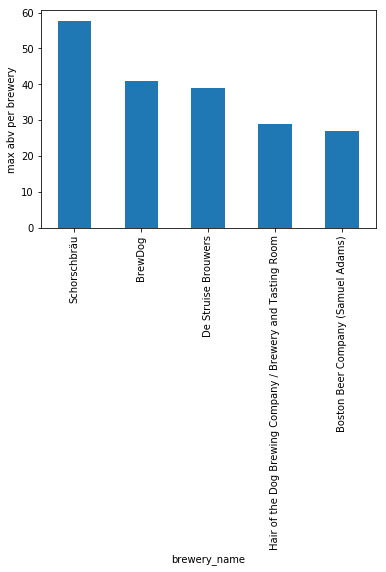

In [11]:
p = brewery_grouped.nlargest(5,[('beer_abv','max')]).plot.bar(x='brewery_name', y=('beer_abv','max'))
t= p.set_ylabel("max abv per brewery")
t= p.get_legend().remove()

Top 5 breweries with the highest average abv in their portfolio:

In [12]:
# selected only breweries which produces more than 5 different beers
min_count = 5
sample_filter = brewery_grouped[('beer_abv','count')] > min_count
avg_abv = brewery_grouped[sample_filter].nlargest(5,[('beer_abv','mean')])
avg_abv

beer_abv                                        brewery_name
                 mean median   max count                                 
brewery_id                                                               
6513        24.690000  16.00  57.7    10                     Schorschbräu
604         10.607143  11.25  13.0    14  Brasserie Dubuisson Frères sprl
201         10.257143  10.50  13.0    28      Brouwerij De Dolle Brouwers
396         10.165769  11.00  12.0    52         AleSmith Brewing Company
15237       10.130435  10.00  39.0    46              De Struise Brouwers

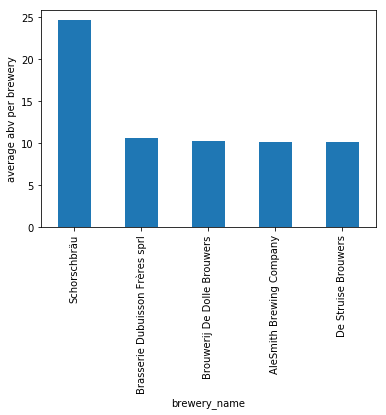

In [13]:
p = avg_abv.nlargest(5,[('beer_abv','mean')]).plot.bar(x='brewery_name', y=('beer_abv','mean'))
t = p.set_ylabel("average abv per brewery")
t = p.get_legend().remove()

Top 5 breweries with the highest abv median in their portfolio:

In [14]:
# The same treshold (at least 5 beers)
median_abv = brewery_grouped[sample_filter].nlargest(5,[('beer_abv','median')])
median_abv

beer_abv                     \
                 mean median   max count   
brewery_id                                 
6513        24.690000  16.00  57.7    10   
604         10.607143  11.25  13.0    14   
396         10.165769  11.00  12.0    52   
201         10.257143  10.50  13.0    28   
173          8.896875  10.00  29.0    32   

                                                 brewery_name  
                                                               
brewery_id                                                     
6513                                             Schorschbräu  
604                           Brasserie Dubuisson Frères sprl  
396                                  AleSmith Brewing Company  
201                               Brouwerij De Dolle Brouwers  
173         Hair of the Dog Brewing Company / Brewery and ...

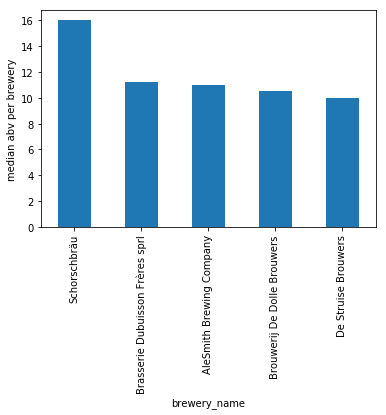

In [15]:
p = avg_abv.nlargest(5,[('beer_abv','median')]).plot.bar(x='brewery_name', y=('beer_abv','median'))
t= p.set_ylabel("median abv per brewery")
t= p.get_legend().remove()

## Answer: Schorschbräu brewery produces the strongest beers (Top2). Also average and median abv for beers from this brewery are the highest.

# 2. If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

In [16]:
# aggregated table for beers (per beer_beerid)
beers_grouped = df.groupby('beer_beerid')
aggregation_dict = {'review_overall': 'mean',
                    'review_aroma': 'mean',
                    'review_appearance': 'mean',
                    'review_palate': 'mean',
                    'review_taste': 'mean',
                    'brewery_id': 'count',
                    'beer_abv': 'max'}
beers_grouped = beers_grouped.agg(aggregation_dict)
# added information about name and brewery
beers_grouped['beer_name'] = beer_df.loc[beers_grouped.index,'beer_name']
beers_grouped['beer_style'] = beer_df.loc[beers_grouped.index,'beer_style']
beers_grouped['brewery_name'] = beer_df.loc[beers_grouped.index,'brewery_name']
# added beer name with brewery name (to print in final results)
beers_grouped['beer/brewery_name'] = beers_grouped['beer_name'].astype(str) + ' (' + beers_grouped['brewery_name'].astype(str) + ')'
beers_grouped.rename(columns = {'brewery_id': 'count'}, inplace=True)
beers_grouped

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name
beer_beerid,,,,,,,,,,,
3,4.166667,4.000000,3.833333,4.166667,4.166667,3,NaN,Cactus Queen IPA,American IPA,Yellow Rose Brewing Company,Cactus Queen IPA (Yellow Rose Brewing Company)
4,3.700000,3.800000,3.950000,3.700000,3.450000,10,NaN,Wildcatter's Crude Stout,American Stout,Yellow Rose Brewing Company,Wildcatter's Crude Stout (Yellow Rose Brewing ...
5,3.549528,3.205189,3.485849,3.318396,3.340802,424,4.5,Amber,Vienna Lager,Abita Brewing Co.,Amber (Abita Brewing Co.)
6,3.706956,3.515964,3.836374,3.513113,3.645382,877,5.6,Turbodog,English Brown Ale,Abita Brewing Co.,Turbodog (Abita Brewing Co.)
7,3.266313,3.179059,3.251138,3.106980,3.101669,659,4.2,Purple Haze,Fruit / Vegetable Beer,Abita Brewing Co.,Purple Haze (Abita Brewing Co.)
...,...,...,...,...,...,...,...,...,...,...,...
77313,3.000000,3.000000,4.000000,3.000000,3.000000,1,4.7,Aass Gourmet Pale Ale,American Blonde Ale,Aass Brewery,Aass Gourmet Pale Ale (Aass Brewery)
77314,3.500000,3.500000,4.000000,3.000000,4.000000,1,4.7,Betty Brown Norwegian Brwon Ale,American Brown Ale,Lervig Aktiebryggeri AS,Betty Brown Norwegian Brwon Ale (Lervig Aktieb...
77315,3.500000,4.500000,3.000000,3.000000,3.500000,1,5.2,Icelandic White Beer,Witbier,Einstök Ölgerð,Icelandic White Beer (Einstök Ölgerð)


### Number of reviews analysis to estimate threshold (minimum number of reviews to take rated beer into account):

Histogram for number of reviews

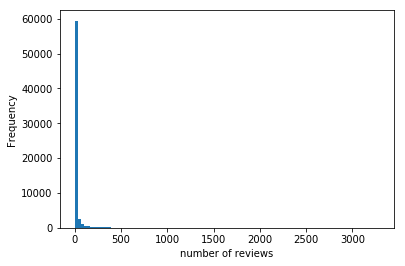

In [17]:
count_hist = beers_grouped['count'].plot.hist(bins=100)
count_hist.set_xlabel("number of reviews")
ax=count_hist

Used log scale to create more clear histogram

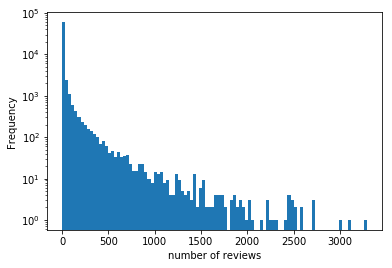

In [18]:
count_hist = beers_grouped['count'].plot.hist(bins=100, logy=True)
count_hist.set_xlabel("number of reviews")
ax=count_hist

Impact of threshold on total numbers of beers and reviews which will be taken into account in the recommendation (in %)

In [19]:
# table cration with information about % of used reviews and beers in treshold function
threshold_results ={}
# total number of reviews
total_rewiwes = beers_grouped['count'].sum()
# total number of beers
total_beers = len(beers_grouped)
for i in range(5, 105, 5):
    threshold = i
    filter_t = beers_grouped['count'] >=threshold
    sum_reviews = beers_grouped[filter_t]['count'].sum()
    number_of_beers = len(beers_grouped[filter_t])
    percent_rev =round(sum_reviews/total_rewiwes*100,1)
    percent_beers = round(number_of_beers/total_beers*100,1)
    threshold_results[i] = [percent_rev, percent_beers,]

df_threshold = pd.DataFrame(threshold_results, index=['Used % of reviews','Used % of beers'])
df_threshold = df_threshold.transpose()
df_threshold.index.name = 'threshold'

In [20]:
df_threshold

,Used % of reviews,Used % of beers
threshold,,
5,95.2,33.9
10,91.8,21.5
15,89.4,16.6
20,87.5,13.9
25,85.9,12.2
30,84.4,10.9
35,83.1,9.9
40,81.9,9.1
45,80.7,8.4


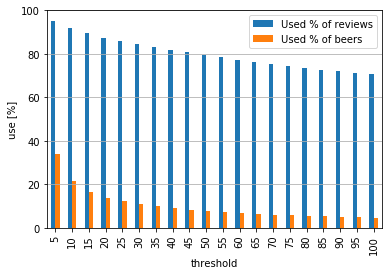

In [21]:
ax = df_threshold.plot.bar()
ax.set_xlabel("threshold")
ax.set_ylabel("use [%]")
ax.grid(True, axis='y')
ax1=ax

#### Based on results I decided to use threshold = 10 reviews. We wil take into account more than 20% rated beers and around 92% of reviews

In [22]:
threshold =10
sample_filter = beers_grouped['count'] >= threshold

#### To take into account the number of reviews in the final ranking I also calculated a weighted rating. It's the same methodology as used by IMDB/Filmweb to take into account the number of votes on each movie

In [23]:
# weighted_overall calculated as (c/c+m)*a + (m/(c+m))*A
# A: average review_overall from all reviews in DB
# c - number of reviews for the beer (based on threshold)
# m - min_count to be taken into acount in the ranking
# a - review_overall average for the beer
A = df['review_overall'].mean()
beers_grouped['weighted_rating'] = (
                                    (beers_grouped['count']/(beers_grouped['count'] + min_count)) * beers_grouped['review_overall'] 
                                     + 
                                     (min_count/(beers_grouped['count'] + min_count)) * A
                                    )
beers_grouped.head(5)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
3,4.166667,4.000000,3.833333,4.166667,4.166667,3,NaN,Cactus Queen IPA,American IPA,Yellow Rose Brewing Company,Cactus Queen IPA (Yellow Rose Brewing Company),3.947238
4,3.700000,3.800000,3.950000,3.700000,3.450000,10,NaN,Wildcatter's Crude Stout,American Stout,Yellow Rose Brewing Company,Wildcatter's Crude Stout (Yellow Rose Brewing ...,3.738527
5,3.549528,3.205189,3.485849,3.318396,3.340802,424,4.5,Amber,Vienna Lager,Abita Brewing Co.,Amber (Abita Brewing Co.),3.552629
6,3.706956,3.515964,3.836374,3.513113,3.645382,877,5.6,Turbodog,English Brown Ale,Abita Brewing Co.,Turbodog (Abita Brewing Co.),3.707571
7,3.266313,3.179059,3.251138,3.106980,3.101669,659,4.2,Purple Haze,Fruit / Vegetable Beer,Abita Brewing Co.,Purple Haze (Abita Brewing Co.),3.270449


#### Top 3 beers based on weighted ranking (from population filtered by threshold)

In [24]:
beers_grouped_tsh = beers_grouped[sample_filter]
beers_grouped_tsh.nlargest(3,'weighted_rating')

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
63649,4.848485,4.757576,4.469697,4.803030,4.848485,33,NaN,Rare D.O.S.,American Double / Imperial Stout,Peg's Cantina & Brewpub / Cycle Brewing,Rare D.O.S. (Peg's Cantina & Brewpub / Cycle B...,4.712576
44910,4.820513,4.615385,4.423077,4.576923,4.743590,39,7.0,Dirty Horse,Lambic - Unblended,De Struise Brouwers,Dirty Horse (De Struise Brouwers),4.706316
68548,4.730769,4.715385,4.523077,4.669231,4.730769,65,6.0,Armand'4 Oude Geuze Lente (Spring),Gueuze,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Lente (Spring) (Brouwerij ...,4.665399


## Answer (1): If someone wants to try beers with the best reviews I will recommend beers from the table above

### The second approach - I will ask about abv preferences

The beer with the highest weighted rating from the previous step will be excluded here because lack of abv info

Top 3 for beers from different abv ranges

In [25]:
beers_by_prc = {}
# 0-2% abv
sample_filter = beers_grouped_tsh['beer_abv'] <= 2
result = beers_grouped_tsh[sample_filter].nlargest(3,'weighted_rating')
beers_by_prc['0-2%'] = result['beer/brewery_name'].tolist()
result

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
8626,4.768293,4.353659,4.182927,4.390244,4.560976,41,2.0,Southampton Berliner Weisse,Berliner Weissbier,Southampton Publick House,Southampton Berliner Weisse (Southampton Publi...,4.664737
67743,3.750000,3.593750,3.875000,3.687500,3.687500,16,1.8,Kvass,Kvass,Beaver Brewing Company,Kvass (Beaver Brewing Company),3.765614
42484,3.461538,3.115385,3.653846,3.615385,3.634615,26,0.5,Kvas,Kvass,All Stars Bakery,Kvas (All Stars Bakery),3.518642


In [26]:
# 2-5% abv
sample_filter = (beers_grouped_tsh['beer_abv'] > 2) & (beers_grouped_tsh['beer_abv'] <= 5)
result = beers_grouped_tsh[sample_filter].nlargest(3,'weighted_rating')
beers_by_prc['2-5%'] = result['beer/brewery_name'].tolist()
result

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
36316,4.628205,4.528846,4.644231,4.493590,4.628205,156,5.0,Cantillon Blåbær Lambik,Lambic - Fruit,Brasserie Cantillon,Cantillon Blåbær Lambik (Brasserie Cantillon),4.602968
22173,4.534351,4.137405,4.190840,4.343511,4.412214,131,4.8,Reality Czeck,Czech Pilsener,Moonlight Brewing Company,Reality Czeck (Moonlight Brewing Company),4.507926
39238,4.516484,4.016484,4.076923,4.126374,4.241758,91,4.8,32/50,Kölsch,COAST Brewing Company,32/50 (COAST Brewing Company),4.479978


In [27]:
# 5-10% abv
sample_filter = (beers_grouped_tsh['beer_abv'] > 5) & (beers_grouped_tsh['beer_abv'] <= 10)
result = beers_grouped_tsh[sample_filter].nlargest(3,'weighted_rating')
beers_by_prc['5-10%'] = result['beer/brewery_name'].tolist()
result

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
44910,4.820513,4.615385,4.423077,4.576923,4.743590,39,7.00,Dirty Horse,Lambic - Unblended,De Struise Brouwers,Dirty Horse (De Struise Brouwers),4.706316
68548,4.730769,4.715385,4.523077,4.669231,4.730769,65,6.00,Armand'4 Oude Geuze Lente (Spring),Gueuze,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Lente (Spring) (Brouwerij ...,4.665399
58610,4.684615,4.569231,4.400000,4.361538,4.546154,65,5.25,Hoppy Birthday,American Pale Ale (APA),Alpine Beer Company,Hoppy Birthday (Alpine Beer Company),4.622541


In [28]:
# 10%+ abv
sample_filter = beers_grouped_tsh['beer_abv'] > 10
result = beers_grouped_tsh[sample_filter].nlargest(3,'weighted_rating')
beers_by_prc['10+%'] = result['beer/brewery_name'].tolist()
result

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
1545,4.617925,4.583333,4.454009,4.633255,4.718553,1272,10.2,Trappist Westvleteren 12,Quadrupel (Quad),Brouwerij Westvleteren (Sint-Sixtusabdij van W...,Trappist Westvleteren 12 (Brouwerij Westvleter...,4.614783
24273,4.750000,4.785714,4.482143,4.803571,4.857143,28,11.6,M Belgian-Style Barleywine,American Barleywine,Midnight Sun Brewing Co.,M Belgian-Style Barleywine (Midnight Sun Brewi...,4.608421
21690,4.600000,4.723770,4.482787,4.612295,4.724590,610,11.0,Pliny The Younger,American Double / Imperial IPA,Russian River Brewing Company,Pliny The Younger (Russian River Brewing Company),4.593623


In [29]:
recommended_beers = pd.DataFrame(beers_by_prc)
recommended_beers

,0-2%,2-5%,5-10%,10+%
0,Southampton Berliner Weisse (Southampton Publi...,Cantillon Blåbær Lambik (Brasserie Cantillon),Dirty Horse (De Struise Brouwers),Trappist Westvleteren 12 (Brouwerij Westvleter...
1,Kvass (Beaver Brewing Company),Reality Czeck (Moonlight Brewing Company),Armand'4 Oude Geuze Lente (Spring) (Brouwerij ...,M Belgian-Style Barleywine (Midnight Sun Brewi...
2,Kvas (All Stars Bakery),32/50 (COAST Brewing Company),Hoppy Birthday (Alpine Beer Company),Pliny The Younger (Russian River Brewing Company)


## Answer(2): I recommend beers form the table above. Please select abv group.

Another possible approach - a table with 3 the best beers (based on weighted rating) for each beer style. If someone is interested in a specific beer style then can decide using this table.

In [30]:
# still using table with reviews treshold
beers_grouped_tsh = beers_grouped_tsh.sort_values(['weighted_rating'], ascending=False)
style_grouped = beers_grouped_tsh.groupby('beer_style')
df_top_by_style = style_grouped.head(3).sort_values('beer_style')
df_top_by_style

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
12716,4.452381,4.095238,4.238095,4.261905,4.214286,21,4.5,Im Füchschen Alt,Altbier,Brauerei Im Füchschen,Im Füchschen Alt (Brauerei Im Füchschen),4.329919
44410,4.468750,4.187500,4.062500,4.250000,4.250000,16,6.3,ALTerior Motive,Altbier,COAST Brewing Company,ALTerior Motive (COAST Brewing Company),4.313234
6420,4.416667,4.083333,4.416667,4.250000,4.250000,18,4.6,Schumacher Alt,Altbier,Brauerei Schumacher,Schumacher Alt (Brauerei Schumacher),4.285996
12169,4.038462,3.346154,3.461538,3.807692,3.730769,13,NaN,Kangaroo Love,American Adjunct Lager,DuClaw Brewing Company,Kangaroo Love (DuClaw Brewing Company),3.976550
16108,4.055556,3.638889,3.472222,3.750000,3.777778,18,NaN,Hauenstein,American Adjunct Lager,August Schell Brewing Company,Hauenstein (August Schell Brewing Company),4.003387
...,...,...,...,...,...,...,...,...,...,...,...,...
48250,3.950000,4.000000,3.987500,4.000000,4.012500,40,7.3,Arctic Circle Ale,Sahti,Malmgårdin Panimo,Arctic Circle Ale (Malmgårdin Panimo),3.935065
19346,4.342105,4.263158,4.026316,4.078947,4.342105,19,4.9,Juhlia,Sahti,Heavyweight Brewing Co.,Juhlia (Heavyweight Brewing Co.),4.232413
59014,4.368421,4.210526,4.315789,4.368421,4.236842,19,11.0,Dominus Vobiscum Brut,Bière de Champagne / Bière Brut,Microbrasserie Charlevoix,Dominus Vobiscum Brut (Microbrasserie Charlevoix),4.253246


# 3. What are the factors that impacts the quality of beer the most ?

I will use correlation function to check impact of other ratings (taste/aroma/palate/appearance) on the overall result

In [31]:
# listo of df columns reduced to reviews and abv
corr = df[['review_overall', 'review_taste','review_aroma','review_appearance','review_palate', 'beer_abv']].corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,review_overall,review_taste,review_aroma,review_appearance,review_palate,beer_abv
review_overall,1.000000,0.789816,0.616013,0.501732,0.701914,0.138512
review_taste,0.789816,1.000000,0.716776,0.546980,0.734135,0.290827
review_aroma,0.616013,0.716776,1.000000,0.561029,0.616947,0.332570
review_appearance,0.501732,0.546980,0.561029,1.000000,0.566634,0.263941
review_palate,0.701914,0.734135,0.616947,0.566634,1.000000,0.286711
beer_abv,0.138512,0.290827,0.332570,0.263941,0.286711,1.000000


## Answer: Taste has the most significant impact on overall impression. The second is palate.

### Graphical representation of dependencies

Dataframe sample used to generate charts due to memory limits and chart readability

In [32]:
df_sample = df.sample(10000, random_state=1)

In [33]:
# created tables with information of count for reach review value combinations. Sepoarate tables for each factor in comarison to overall review
comparison_dict = {}
# overall vs aroma
temp = df_sample.groupby(['review_overall','review_aroma']).size().reset_index().rename(columns={0:'count'})
comparison_dict['review_aroma'] = temp
temp

,review_overall,review_aroma,count
0,1.0,1.0,24
1,1.0,1.5,7
2,1.0,2.0,15
3,1.0,2.5,5
4,1.0,3.0,4
...,...,...,...
67,5.0,3.0,14
68,5.0,3.5,47
69,5.0,4.0,163
70,5.0,4.5,188


In [34]:
# the same for appearance, palate and taste
temp = df_sample.groupby(['review_overall','review_appearance']).size().reset_index().rename(columns={0:'count'})
comparison_dict['review_appearance'] = temp
temp = df_sample.groupby(['review_overall','review_palate']).size().reset_index().rename(columns={0:'count'})
comparison_dict['review_palate'] = temp
temp = df_sample.groupby(['review_overall','review_taste']).size().reset_index().rename(columns={0:'count'})
comparison_dict['review_taste'] = temp

Scatter plots where marker size represents counts for a combination of selected factor (aroma/appearance/palate/taste) and overall review

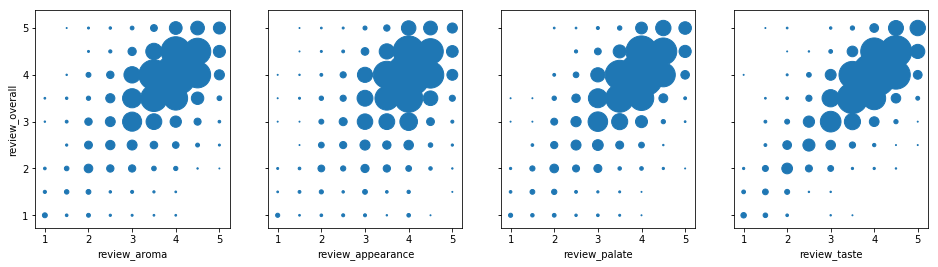

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey =True, figsize=(16, 4))

comparison_dict['review_aroma'].plot.scatter(x='review_aroma',y='review_overall', s=comparison_dict['review_aroma']['count'], ax=ax1)
comparison_dict['review_appearance'].plot.scatter(x='review_appearance',y='review_overall', s=comparison_dict['review_appearance']['count'], ax=ax2)
comparison_dict['review_palate'].plot.scatter(x='review_palate',y='review_overall', s=comparison_dict['review_palate']['count'], ax=ax3)
comparison_dict['review_taste'].plot.scatter(x='review_taste',y='review_overall', s=comparison_dict['review_taste']['count'], ax=ax4)


## Visual observation confirms results from the correlation table. The dispersion for taste is the lowest.

# 4. I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

Table grouped by beer style with information about aroma and appearance reviews (average/std/std error):

In [36]:
# aggregated table for beer styles (per beer_style)
aggregation_dict = {'review_overall': 'mean',
                    'review_aroma': ['mean','std'],
                    'review_appearance': ['mean','std'],
                    'brewery_id': 'count',
                    'beer_beerid': pd.Series.nunique}
styles_grouped = df.groupby('beer_style').agg(aggregation_dict)
styles_grouped.rename(columns = {'brewery_id': 'count'}, inplace=True)
styles_grouped.rename(columns = {'beer_beerid': 'unique_beers'}, inplace=True)
# std errors for aroma and apperance
styles_grouped[('review_aroma','std_err')] = styles_grouped[('review_aroma','std')]/(styles_grouped[('count','count')]**0.5)
styles_grouped[('review_appearance','std_err')] = styles_grouped[('review_appearance','std')]/(styles_grouped[('count','count')]**0.5)
styles_grouped

review_overall review_aroma            \
                                          mean         mean       std   
beer_style                                                              
Altbier                               3.824054     3.624015  0.582302   
American Adjunct Lager                3.001659     2.480211  0.719682   
American Amber / Red Ale              3.781010     3.627254  0.622302   
American Amber / Red Lager            3.564601     3.213296  0.649663   
American Barleywine                   3.896756     4.019343  0.524657   
...                                        ...          ...       ...   
Winter Warmer                         3.703935     3.707178  0.596636   
Witbier                               3.776891     3.640876  0.615472   
Happoshu                              2.914938     2.595436  0.756376   
Sahti                                 3.700283     3.827992  0.635698   
Bière de Champagne / Bière Brut       3.648184     3.734704  0.704483   

                                review_appearance            count  \
                                             mean       std  count   
beer_style                                                           
Altbier                                  3.809327  0.514903   7741   
American Adjunct Lager                   2.788546  0.737899  30749   
American Amber / Red Ale                 3.810190  0.543047  45751   
American Amber / Red Lager               3.527494  0.603290   9311   
American Barleywine                      4.036535  0.478719  26728   
...                                           ...       ...    ...   
Winter Warmer                            3.844635  0.508770  20661   
Witbier                                  3.686695  0.579391  30140   
Happoshu                                 2.925311  0.797537    241   
Sahti                                    3.655985  0.575797   1061   
Bière de Champagne / Bière Brut          4.045889  0.611921   1046   

                                unique_beers review_aroma review_appearance  
                                     nunique      std_err           std_err  
beer_style                                                                   
Altbier                                  553     0.006618          0.005852  
American Adjunct Lager                  1142     0.004104          0.004208  
American Amber / Red Ale                2512     0.002909          0.002539  
American Amber / Red Lager               360     0.006733          0.006252  
American Barleywine                      832     0.003209          0.002928  
...                                      ...          ...               ...  
Winter Warmer                            636     0.004151          0.003540  
Witbier                                 1252     0.003545          0.003337  
Happoshu                                  71     0.048722          0.051374  
Sahti                                     28     0.019516          0.017677  
Bière de Champagne / Bière Brut           20     0.021782          0.018920  

[104 rows x 9 columns]

In [37]:
min_rev = min(styles_grouped[('count','count')])
min_beers = min(styles_grouped[('unique_beers','nunique')])
print(f'The lowest number of reviews for a specific beer style is {min_rev}. We also have at least {min_beers} unique beers for the beer style. No threshold will be used for beer styles analysis.')

The lowest number of reviews for a specific beer style is 241. We also have at least 19 unique beers for the beer style. No threshold will be used for beer styles analysis.


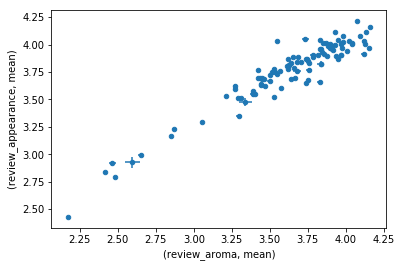

In [38]:
ax = styles_grouped.plot.scatter(x=('review_aroma','mean'), y=('review_appearance','mean'), 
                            yerr=styles_grouped[('review_appearance','std_err')],
                            xerr=styles_grouped[('review_aroma','std_err')]),

Std error negligible

Table to list beer styles with the highest aroma and apperance

In [39]:
styles_grouped.sort_values([('review_aroma','mean'),('review_appearance','mean')], ascending=False).head(10)

review_overall review_aroma            \
                                           mean         mean       std   
beer_style                                                               
American Double / Imperial Stout       4.029820     4.160665  0.570496   
Eisbock                                3.977094     4.156778  0.528950   
Quadrupel (Quad)                       4.071630     4.132533  0.544143   
American Wild Ale                      4.093262     4.126756  0.565143   
Lambic - Unblended                     4.048923     4.118043  0.528375   
Gueuze                                 4.086287     4.117574  0.560086   
American Double / Imperial IPA         3.998017     4.097782  0.568236   
Russian Imperial Stout                 4.023084     4.076576  0.542319   
Weizenbock                             4.007969     4.044677  0.519257   
Flanders Red Ale                       3.992722     4.044043  0.570528   

                                 review_appearance            count  \
                                              mean       std  count   
beer_style                                                            
American Double / Imperial Stout          4.163633  0.515715  50705   
Eisbock                                   3.964514  0.496758   2663   
Quadrupel (Quad)                          4.117964  0.514112  18086   
American Wild Ale                         4.005451  0.501612  17794   
Lambic - Unblended                        3.912478  0.514582   1114   
Gueuze                                    4.034864  0.499991   6009   
American Double / Imperial IPA            4.078916  0.469188  85977   
Russian Imperial Stout                    4.210072  0.508614  54129   
Weizenbock                                4.009297  0.510222   9412   
Flanders Red Ale                          4.001801  0.478014   6664   

                                 unique_beers review_aroma review_appearance  
                                      nunique      std_err           std_err  
beer_style                                                                    
American Double / Imperial Stout          934     0.002534          0.002290  
Eisbock                                    69     0.010250          0.009626  
Quadrupel (Quad)                          203     0.004046          0.003823  
American Wild Ale                         719     0.004237          0.003760  
Lambic - Unblended                         71     0.015831          0.015417  
Gueuze                                     94     0.007225          0.006450  
American Double / Imperial IPA           1549     0.001938          0.001600  
Russian Imperial Stout                    869     0.002331          0.002186  
Weizenbock                                311     0.005352          0.005259  
Flanders Red Ale                          145     0.006989          0.005856

## American Double / Imperial Stout selected as a beer style where usually rates for aroma and appearance are the highest. This criteria was used as the best aroma/appearance match with beer style. 
Russian Imperial Stout has the highest average appearance, but clearly lower aroma.

I will recommend beer from American Double / Imperial Stout with the highest aroma and appearance (used table from question 2)

American Double / Imperial Stout beers with the highest aroma:

In [40]:
df_selected_style = beers_grouped_tsh[beers_grouped_tsh['beer_style'] == 'American Double / Imperial Stout']
df_selected_style.sort_values('review_aroma', ascending = False).head(3)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
63649,4.848485,4.757576,4.469697,4.803030,4.848485,33,NaN,Rare D.O.S.,American Double / Imperial Stout,Peg's Cantina & Brewpub / Cycle Brewing,Rare D.O.S. (Peg's Cantina & Brewpub / Cycle B...,4.712576
54035,4.478261,4.695652,4.456522,4.434783,4.586957,23,12.0,AleSmith Speedway Stout - Kopi Luwak,American Double / Imperial Stout,AleSmith Brewing Company,AleSmith Speedway Stout - Kopi Luwak (AleSmith...,4.359925
62397,4.544177,4.658635,4.269076,4.594378,4.767068,249,13.0,Rare Bourbon County Stout,American Double / Imperial Stout,Goose Island Beer Co.,Rare Bourbon County Stout (Goose Island Beer Co.),4.529834


American Double / Imperial Stout beers with the highest appearance:

In [41]:
df_selected_style.sort_values('review_appearance', ascending = False).head(3)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,count,beer_abv,beer_name,beer_style,brewery_name,beer/brewery_name,weighted_rating
beer_beerid,,,,,,,,,,,,
34420,4.450779,4.443343,4.593484,4.513102,4.588173,1412,11.0,The Abyss,American Double / Imperial Stout,Deschutes Brewery,The Abyss (Deschutes Brewery),4.448538
47022,4.365967,4.369464,4.587413,4.511655,4.564103,429,11.5,Hunahpu's Imperial Stout,American Double / Imperial Stout,Cigar City Brewing,Hunahpu's Imperial Stout (Cigar City Brewing),4.359627
65673,4.394737,4.526316,4.552632,3.973684,4.500000,19,17.5,Black (黑) Cognac Edition,American Double / Imperial Stout,Mikkeller ApS,Black (黑) Cognac Edition (Mikkeller ApS),4.274079


## Answer: You should buy Rare D.O.S. - it's a beer with the highest aroma American Double / Imperial Stout beer style. This beer is also the leader of our ranking from question 2. Rare D.O.S. doesn't have the highest rate for appearance, but it is not significantly lower than the value for the leader. Additionally, based on question 3 we know that appearance has a lower correlation with overall review than aroma.